In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_style('white')
sns.set_context('paper')
sns.set()
import random
from sklearn.manifold import TSNE

legend_size = 14

In [85]:
split = '1' # Split used in cross validation Select from [1, 2,3,4]
models = [f'Mechanistic_{split}_q475', f'Mechanistic_{split}_q25', f'MechanisticGauss_{split}']
selected = models[0]
data_path = f"data/proc/results_{selected}/"
treatment = np.load(data_path + 'treatments.npy')
devices = np.load(data_path + 'devices.npy')
y = np.load(data_path + 'observations.npy')
times = np.load(data_path + 'times.npy')


mu_50_post = np.load(data_path + 'mu_50_post.npy')
mu_25_post = np.load(data_path + 'mu_25_post.npy')
mu_75_post = np.load(data_path + 'mu_75_post.npy')
x_post = np.load(data_path + 'solution_xt_post.npy')
x_post = np.swapaxes(x_post,1,2)

mu_50_prior = np.load(data_path + 'mu_50_prior.npy')
mu_25_prior = np.load(data_path + 'mu_25_prior.npy')
mu_75_prior = np.load(data_path + 'mu_75_prior.npy')
x_prior = np.load(data_path + 'solution_xt_prior.npy')
x_prior = np.swapaxes(x_prior,1,2)

print("data_path: ", data_path)

data_path:  data/proc/results_Mechanistic_1_q475/


In [86]:
print(treatment.shape)
print(devices.shape)
print(y.shape)
print(times.shape)
print(mu_75_prior.shape)
print(x_post.shape)

(78, 2)
(78, 7)
(78, 4, 100)
(100,)
(78, 4, 100)
(78, 8, 100)


In [87]:
# print(treatment)

## Plot scatter plots at end time point

Mechanistic_1_q475 l1_error_av_prior:  16.524394546236312


<Figure size 640x480 with 0 Axes>

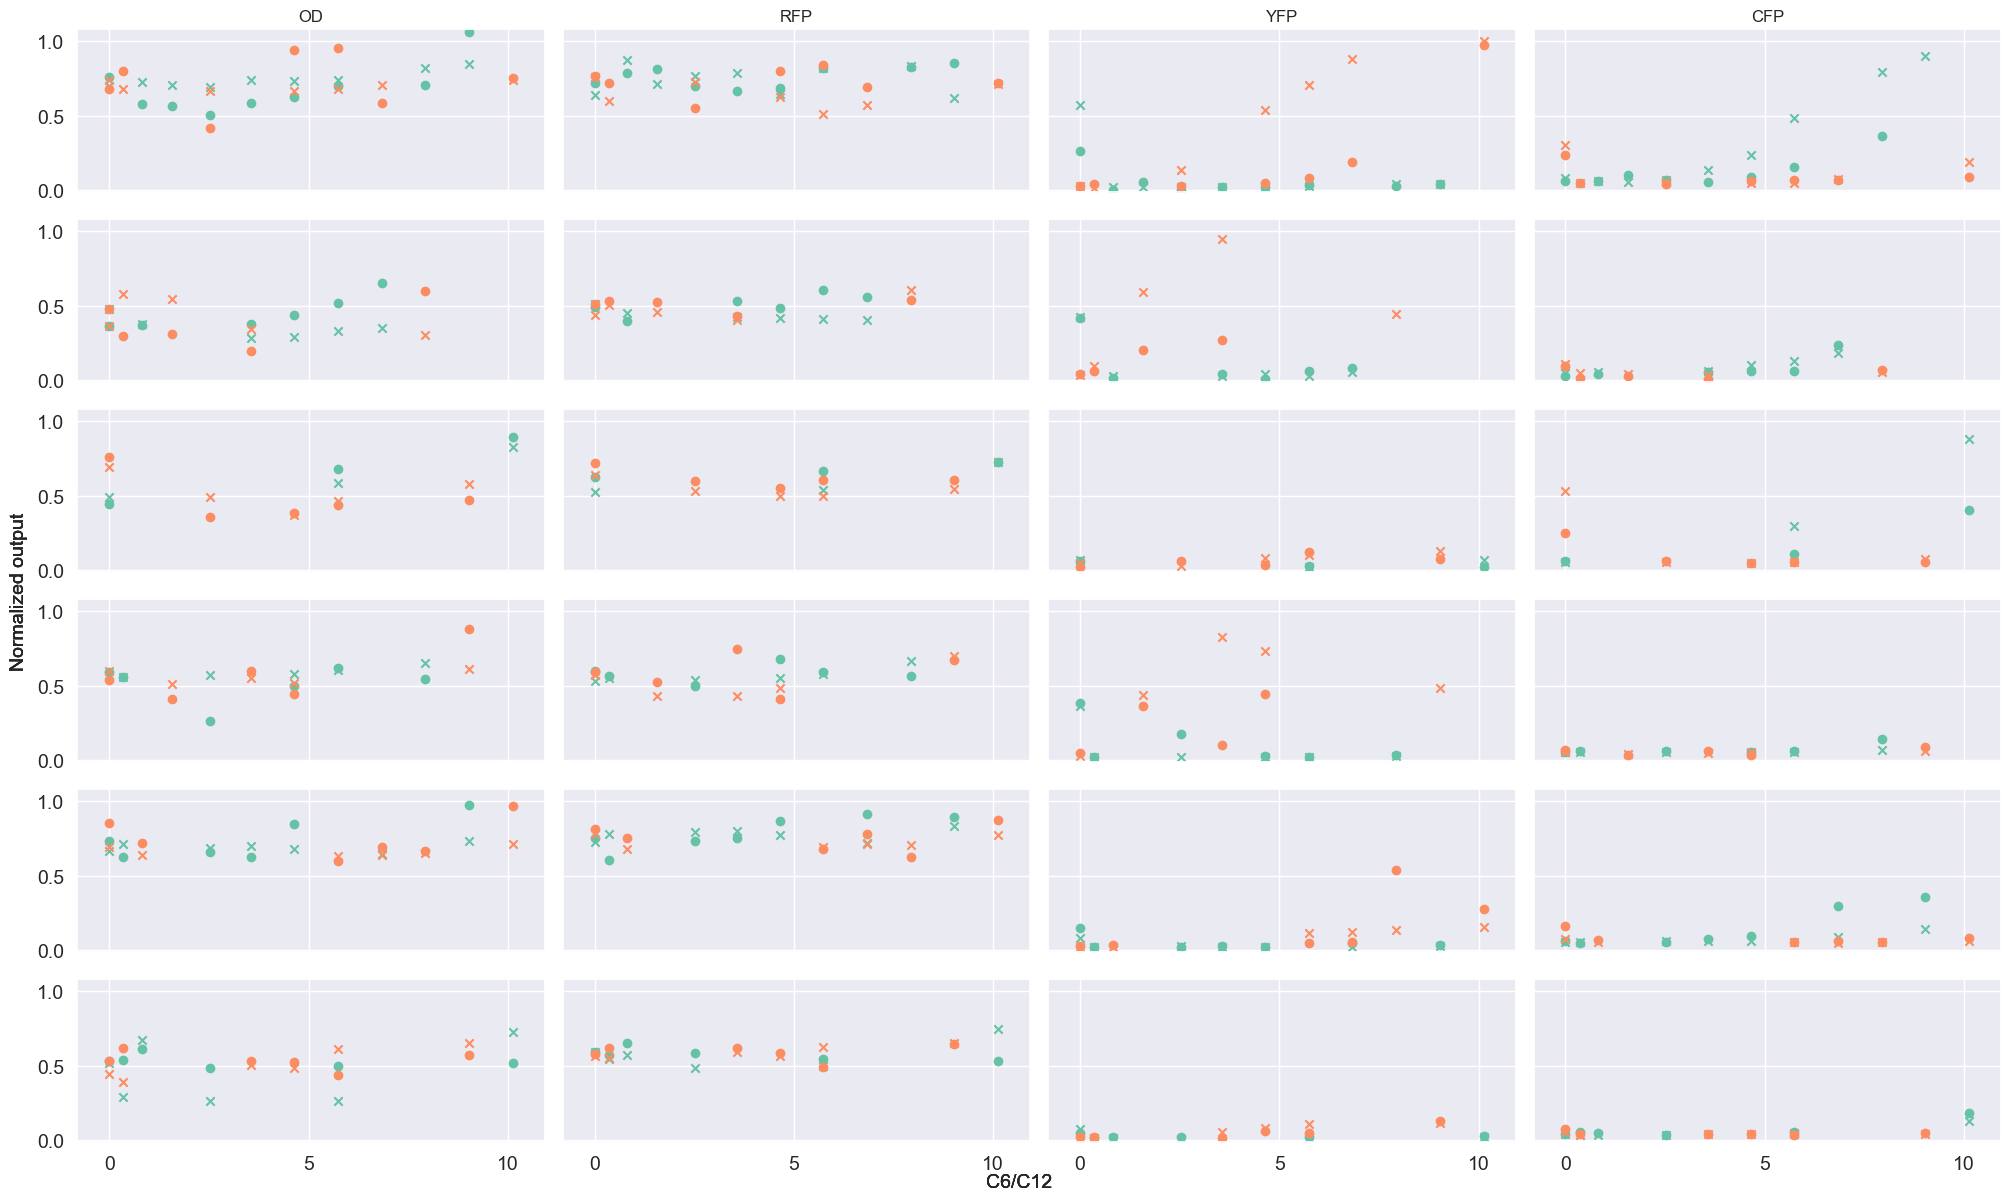

In [88]:
plt.clf()

fs = 14
mu_50 = mu_50_prior
colors = sns.color_palette("Set2", 8)
l1_error = 0
unique_treat = np.unique(treatment)
unique_devices = np.unique(devices, axis=0)
cols = ['OD', 'RFP', 'YFP', 'CFP']
fig, axs = plt.subplots(len(unique_devices), len(cols), sharex=True, sharey=True, figsize=(20, 12))

for r, device_id in enumerate(unique_devices):
    for t_idx, treat in enumerate(unique_treat):
        comp = np.equal(devices, device_id)
        sel_device = np.sum(comp, 1) == devices.shape[1]
        idx_C6 = np.logical_and(treatment[:, 0] ==  treat, sel_device)
        idx_C12 =  np.logical_and(treatment[:, 1] == treat, sel_device)
        for c in range(len(cols)):
            mu_50_av_c6 = np.mean(mu_50[idx_C6], 0)
            y_av_C6 = np.mean(y[idx_C6], 0)
            
            if np.sum(idx_C6) > 0:
                l1_error += np.sum(np.abs(y_av_C6 - mu_50_av_c6))
         
            mu_50_av_c12 = np.mean(mu_50[idx_C12], 0)
            y_av_C12 = np.mean(y[idx_C12], 0)
            
            if np.sum(idx_C12) > 0:
                l1_error += np.sum(np.abs(y_av_C12 - mu_50_av_c12))
        
            if c == 3 and t_idx == len(unique_treat)-1:
                axs[r, c].scatter(treat, y_av_C6[c, -1], marker='x', color=colors[0], label='C6(data)')
                axs[r, c].scatter(treat, mu_50_av_c6[c, -1], marker='o', color=colors[0], label='C6(model)')
    
                axs[r, c].scatter(treat, y_av_C12[c, -1], marker='x', color=colors[1], label='C12(data)')
                axs[r, c].scatter(treat, mu_50_av_c12[c, -1], marker='o', color=colors[1], label='C12(model)')
            else:
                axs[r, c].scatter(treat, y_av_C6[c, -1], marker='x', color=colors[0])
                axs[r, c].scatter(treat, mu_50_av_c6[c, -1], marker='o', color=colors[0])
    
                axs[r, c].scatter(treat, y_av_C12[c, -1], marker='x', color=colors[1])
                axs[r, c].scatter(treat, mu_50_av_c12[c, -1], marker='o', color=colors[1])
    
            axs[r, c].set_xlim(-0.8,  np.max(treatment)+ 0.8)
            axs[r, c].set_ylim(-0.01, 1.08)
            axs[r, c].set_xticks([0, 5, 10])
            axs[r, c].set_yticks([0, 0.5, 1])
            axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
       
    

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

    fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
    fig.text(0.5, 0, "C6/C12", ha="center", va="bottom", fontsize=fs)
#fig.legend(bbox_to_anchor=(1.08,1))
fig.tight_layout()
fig.tight_layout()

l1_error_av = l1_error/(len(unique_treat)* len(cols) * devices.shape[1] )
print(selected, "l1_error_av_prior: ", l1_error_av)

Mechanistic_1_q475 l1_error_av_post:  6.019482513268788


<Figure size 640x480 with 0 Axes>

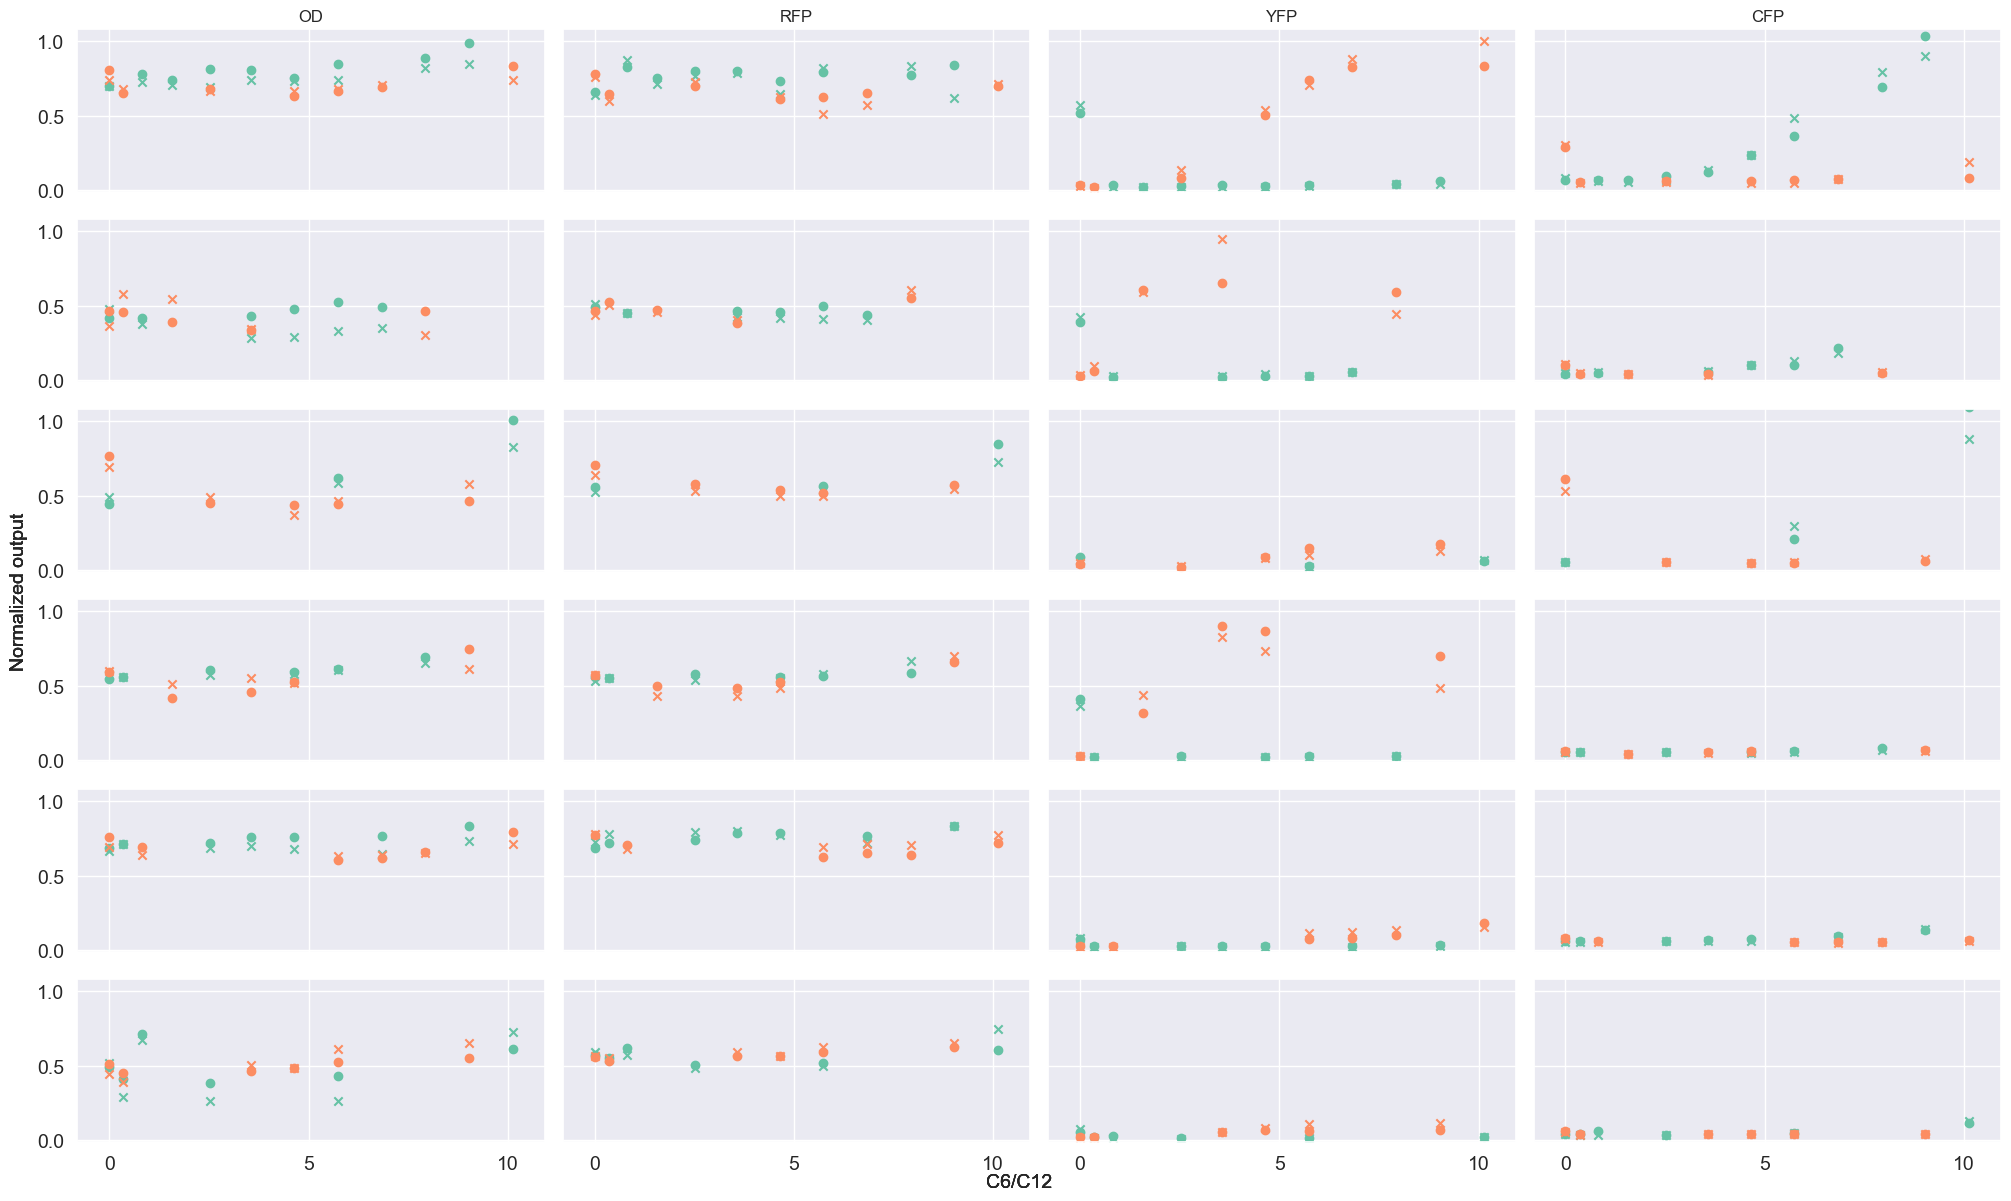

In [89]:
plt.clf()

fs = 14
mu_50 = mu_50_post
colors = sns.color_palette("Set2", 8)
l1_error = 0
unique_treat = np.unique(treatment)
unique_devices = np.unique(devices, axis=0)
cols = ['OD', 'RFP', 'YFP', 'CFP']
fig, axs = plt.subplots(len(unique_devices), len(cols), sharex=True, sharey=True, figsize=(20, 12))

for r, device_id in enumerate(unique_devices):
    for t_idx, treat in enumerate(unique_treat):
        comp = np.equal(devices, device_id)
        sel_device = np.sum(comp, 1) == devices.shape[1]
        idx_C6 = np.logical_and(treatment[:, 0] ==  treat, sel_device)
        idx_C12 =  np.logical_and(treatment[:, 1] == treat, sel_device)
        for c in range(len(cols)):
            mu_50_av_c6 = np.mean(mu_50[idx_C6], 0)
            y_av_C6 = np.mean(y[idx_C6], 0)
            
            if np.sum(idx_C6) > 0:
                l1_error += np.sum(np.abs(y_av_C6 - mu_50_av_c6))
         
            mu_50_av_c12 = np.mean(mu_50[idx_C12], 0)
            y_av_C12 = np.mean(y[idx_C12], 0)
            
            if np.sum(idx_C12) > 0:
                l1_error += np.sum(np.abs(y_av_C12 - mu_50_av_c12))
        
            if c == 3 and t_idx == len(unique_treat)-1:
                axs[r, c].scatter(treat, y_av_C6[c, -1], marker='x', color=colors[0], label='C6(data)')
                axs[r, c].scatter(treat, mu_50_av_c6[c, -1], marker='o', color=colors[0], label='C6(model)')
    
                axs[r, c].scatter(treat, y_av_C12[c, -1], marker='x', color=colors[1], label='C12(data)')
                axs[r, c].scatter(treat, mu_50_av_c12[c, -1], marker='o', color=colors[1], label='C12(model)')
            else:
                axs[r, c].scatter(treat, y_av_C6[c, -1], marker='x', color=colors[0])
                axs[r, c].scatter(treat, mu_50_av_c6[c, -1], marker='o', color=colors[0])
    
                axs[r, c].scatter(treat, y_av_C12[c, -1], marker='x', color=colors[1])
                axs[r, c].scatter(treat, mu_50_av_c12[c, -1], marker='o', color=colors[1])
    
            axs[r, c].set_xlim(-0.8,  np.max(treatment)+ 0.8)
            axs[r, c].set_ylim(-0.01, 1.08)
            axs[r, c].set_xticks([0, 5, 10])
            axs[r, c].set_yticks([0, 0.5, 1])
            axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
       
    

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

    fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
    fig.text(0.5, 0, "C6/C12", ha="center", va="bottom", fontsize=fs)
#fig.legend(bbox_to_anchor=(1.08,1))
fig.tight_layout()
fig.tight_layout()

l1_error_av = l1_error/(len(unique_treat)* len(cols) * devices.shape[1] )
print(selected, "l1_error_av_post: ", l1_error_av)

## Plot C6/C12 at all times

<Figure size 640x480 with 0 Axes>

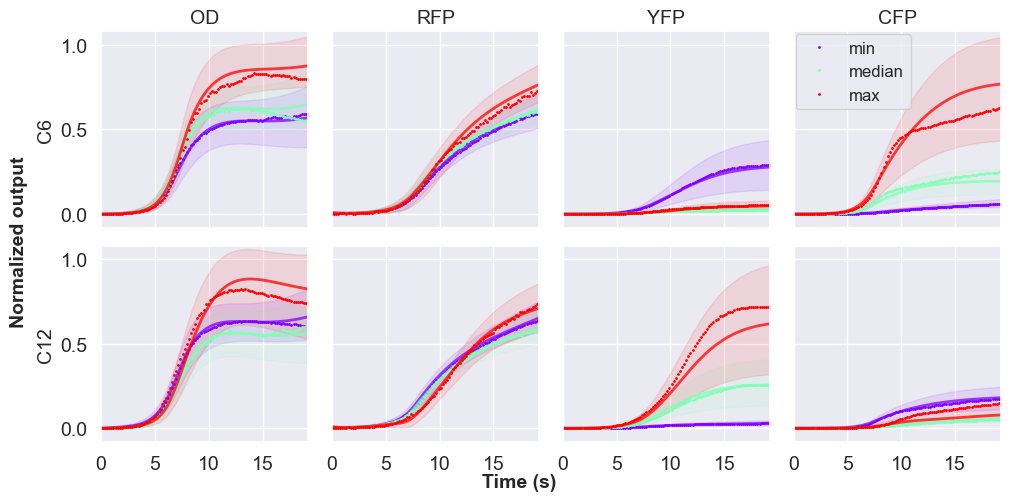

In [90]:
plt.clf()
from matplotlib import cm
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
fs = 14
mu_50 = mu_50_post
mu_25 = mu_25_post
mu_75 = mu_75_post
# [ 0.          0.35303235  0.8198378   1.5707792   2.5202081   3.5637002
#   4.643243    5.735417    6.831874    7.9297667   9.028139   10.126671  ]

selected_treat = [0, 5.735417, 10.126671]
treat_values = ['min', 'median', 'max']

#colors = sns.color_palette("hls", len(selected_treat))
colors = [cm.rainbow(x) for x in np.linspace(0, 1, len(selected_treat))] 
#colors = ['purple', 'orange', 'red']

for t_idx, treat in enumerate(selected_treat):
    for c in range(4):
        for r, t in enumerate(range(treatment.shape[1])):
            idx_C = treatment[:, t] ==  treat
            mu_50_av = np.mean(mu_50[idx_C], 0)
            mu_25_av = np.mean(mu_25[idx_C], 0)
            mu_75_av = np.mean(mu_75[idx_C], 0)
            y_av = np.mean(y[idx_C], 0)
         
            if c ==0 and r==0:
                axs[r, c].plot(times, y_av[c], '.', color=colors[t_idx],  markersize=2, alpha=1, 
                               label=treat_values[t_idx])
            else:
                 axs[r, c].plot(times, y_av[c], '.', color=colors[t_idx],  markersize=2, alpha=1)
            axs[r, c].plot(times, mu_50_av[c], '-', color=colors[t_idx],  lw=2, alpha=0.75)
            axs[r, c].fill_between(times, mu_25_av[c], mu_75_av[c],color=colors[t_idx], alpha=0.1) 
        
            axs[r, c].set_xlim(0.0, max(times) + 0.01)
            axs[r, c].set_ylim(-0.08, 1.08)
            axs[r, c].set_xticks([0, 5, 10, 15])
            axs[r, c].set_yticks([0, 0.5, 1.0])
            axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
        
cols = ['OD', 'RFP', 'YFP', 'CFP']
for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=fs)

rows = ['C6', 'C12']
for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, fontsize=fs)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.5, 0, "Time (s)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.legend(bbox_to_anchor=(0.9,0.93), fontsize=fs-2)
fig.tight_layout()
fig.tight_layout()

<Figure size 640x480 with 0 Axes>

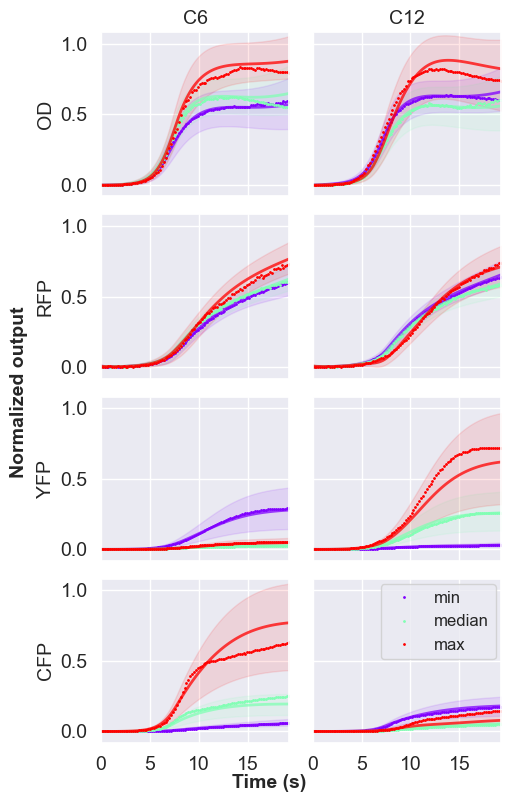

In [91]:
plt.clf()
from matplotlib import cm
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(5, 8))
fs = 14
mu_50 = mu_50_post
mu_25 = mu_25_post
mu_75 = mu_75_post
# [ 0.          0.35303235  0.8198378   1.5707792   2.5202081   3.5637002
#   4.643243    5.735417    6.831874    7.9297667   9.028139   10.126671  ]

selected_treat = [0, 5.735417, 10.126671]
treat_values = ['min', 'median', 'max']

#colors = sns.color_palette("hls", len(selected_treat))
colors = [cm.rainbow(x) for x in np.linspace(0, 1, len(selected_treat))] 
#colors = ['purple', 'orange', 'red']

for t_idx, treat in enumerate(selected_treat):
    for r in range(4):
        for c, t in enumerate(range(treatment.shape[1])):
            idx_C = treatment[:, t] ==  treat
            mu_50_av = np.mean(mu_50[idx_C], 0)
            mu_25_av = np.mean(mu_25[idx_C], 0)
            mu_75_av = np.mean(mu_75[idx_C], 0)
            y_av = np.mean(y[idx_C], 0)
         
            if c ==0 and r==0:
                axs[r, c].plot(times, y_av[r], '.', color=colors[t_idx],  markersize=2, alpha=1, 
                               label=treat_values[t_idx])
            else:
                 axs[r, c].plot(times, y_av[r], '.', color=colors[t_idx],  markersize=2, alpha=1)
            axs[r, c].plot(times, mu_50_av[r], '-', color=colors[t_idx],  lw=2, alpha=0.75)
            axs[r, c].fill_between(times, mu_25_av[r], mu_75_av[r],color=colors[t_idx], alpha=0.1) 
        
            axs[r, c].set_xlim(0.0, max(times) + 0.01)
            axs[r, c].set_ylim(-0.08, 1.08)
            axs[r, c].set_xticks([0, 5, 10, 15])
            axs[r, c].set_yticks([0, 0.5, 1.0])
            axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
        
rows = ['OD', 'RFP', 'YFP', 'CFP']
cols = ['C6', 'C12']
for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=fs)


for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, fontsize=fs)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.5, 0, "Time (s)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.legend(bbox_to_anchor=(0.97,0.27), fontsize=fs-2)
fig.tight_layout()
fig.tight_layout()

# Average stats

In [92]:
def average(method, nELBO, acc, mse, post, prior):
    print(len(nELBO), len(acc), len(mse), len(post), len(post))
    print(method, "nELBO: ", np.mean(nELBO),"ACC: ", np.mean(acc), "MSE: ", np.mean(mse), 'l1_post: ', np.mean(post),
         'l1_prior: ', np.mean(prior))